In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import lightgbm as lgb 

In [2]:
fpath = '../MobilePricePredictionDatatset.csv'
df = pd.read_csv(fpath)

In [3]:
df.sample(10)

,Unnamed: 0,Brand me,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
771,771,Karbonn K451 Power,3.8,6.0,32.0,4.54,48,NaN,3000,1349
163,163,I Kall K22 New,3.6,6.0,64.0,4.50,48,NaN,3000,649
617,617,"Google Pixel 3a (Clearly White, 64 )",4.5,4.0,64.0,5.60,35,20.0,3000,30999
477,477,Nokia 3310 DS,3.8,4.0,64.0,4.54,48,NaN,1200,3580
90,90,Jivi N300 New,3.9,5.0,32.0,4.54,48,8.0,3000,1049
677,677,Kechaoda K111,4.1,6.0,32.0,4.50,48,NaN,3000,985
108,108,"Redmi K20 (Pearl White, 64 )",4.5,6.0,64.0,6.39,48,13.0,3800,21999
736,736,"OPPO Reno2 (Luminous Black, 256 )",4.5,8.0,256.0,6.50,48,8.0,3800,38990
413,413,"OPPO Reno3 Pro (Sky White, 128 )",4.4,8.0,128.0,6.40,64,13.0,4025,29990
577,577,Snexian Guru 106,NaN,6.0,32.0,4.50,25,NaN,1080,649


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     836 non-null    int64  
 1   Brand me       836 non-null    object 
 2   Ratings        805 non-null    float64
 3   RAM            829 non-null    float64
 4   ROM            832 non-null    float64
 5   Mobile_Size    834 non-null    float64
 6   Primary_Cam    836 non-null    int64  
 7   Selfi_Cam      567 non-null    float64
 8   Battery_Power  836 non-null    int64  
 9   Price          836 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 65.4+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [6]:
# 1. Separate X (features) and y (target)
TARGET = 'Price'
NFEATURES = ['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam', 'Battery_Power']
CFEATURES = ['Brand']
y = df[TARGET]
X = df.drop([TARGET, 'Unnamed: 0'], axis=1)

# 2. Simplify `Brand me` column
def identify_brand(brand_me):
    return brand_me.split()[0]
X['Brand'] = X['Brand me'].apply(lambda x: identify_brand(x))

In [10]:
# 3. Split into training and testing subsets
X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

# 4. Save VALIDATION data for scoring (after we've trained and evaluated the model)
X_val.to_csv('../data/scoring_data.csv')
y_val.reset_index(drop=True).to_csv('../data/true_values.csv') 

In [9]:
y_val

527      847
3      18999
127     1399
297     1299
105    18990
       ...  
739    18990
558     1149
372    24999
77      1349
412     1599
Name: Price, Length: 126, dtype: int64

In [9]:
# 5. Create preprocessing pipeline

In [10]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

# 5.1 Preprocessing pipeline for numerical features
numerical_transformer = Pipeline(steps=[
  ('impute', SimpleImputer(strategy='most_frequent'))
])

# 5.2 Preprocessing pipeline for categorical feature (Brand)
categorical_transformer = Pipeline(steps=[
  ('impute', SimpleImputer(strategy='most_frequent')),
  ('encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# 5.3 Combine
preprocessing_pipeline = make_pipeline(ColumnTransformer(
  transformers=[
      ('impute_numerical', numerical_transformer, NFEATURES),
      ('impute_categorical', categorical_transformer, CFEATURES)
  ],
  verbose_feature_names_out=False
))

# 5.4 Fit and transform X DataFrames
preprocessing_pipeline.fit(X_train)
X_train = preprocessing_pipeline.transform(X_train)
X_test = preprocessing_pipeline.transform(X_test)

# 5.5 Save preprocessing pipeline
joblib.dump(preprocessing_pipeline, '../models/preprocessing_pipeline.joblib')

c:\Users\Joseph\miniforge3\envs\xdem-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


['../models/preprocessing_pipeline.joblib']

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 153
[LightGBM] [Info] Number of data points in the train set: 585, number of used features: 17
[LightGBM] [Info] Start training from score 16859.131624
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

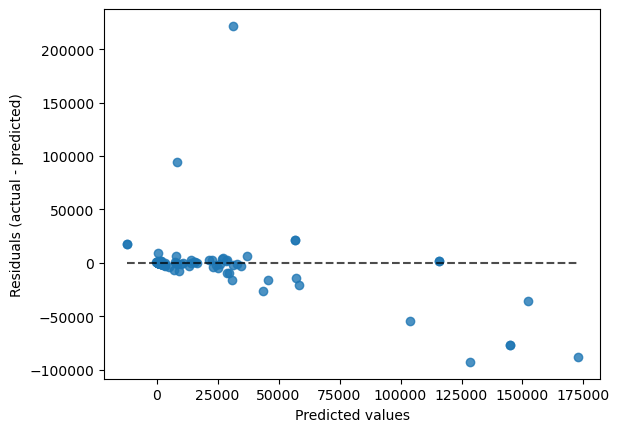

In [11]:
# notebooks/train.ipynb

import lightgbm as lgbm
from sklearn.metrics import mean_absolute_percentage_error, PredictionErrorDisplay
import joblib

model = lgbm.LGBMRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
joblib.dump(model, '../models/model.joblib')
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")
display = PredictionErrorDisplay(y_true=y_test, y_pred=y_pred)
display.plot()

In [50]:
# score.py

import pandas as pd
import joblib
import logging

def main():
    """
    Loads and preprocesses data, loads model, generates 
    predictions, and logs to scores.log
    """

    # Load data to be scored
    X_val = pd.read_csv('../data/scoring_data.csv')

    # Preprocess data
    preprocessing_pipeline = joblib.load('../models/preprocessing_pipeline.joblib')
    X_val = preprocessing_pipeline.transform(X_val)    

    # Load model
    model = joblib.load('../models/model.joblib')
    
    # Generate scores
    scores = model.predict(X_val)
    
    # Log scores
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger(__name__)
    f_handler = logging.FileHandler('scores.log')
    f_format = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
    f_handler.setFormatter(f_format)
    logger.addHandler(f_handler)
    logger.info(f'Scores: {scores}')

if __name__ == '__main__':
    main()

c:\Users\Joseph\miniforge3\envs\xdem-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
INFO:__main__:Scores: [ 9.78734517e+02  2.06176891e+03  1.26111611e+05  6.51014640e+02
  6.96363721e+02 -2.66460999e+03  1.93357452e+05  2.87379015e+04
  1.07850465e+03  1.00122885e+03  1.58184715e+03 -1.35399885e+02
  1.78849286e+03  3.56314257e+03  7.47344486e+02  1.58184715e+03
  4.52124646e+04 -4.69854439e+02  2.85520425e+02  4.61619529e+04
  2.38741535e+03  4.39358107e+04 -4.56219538e+03  2.11783034e+04
  5.60971585e+04  4.91109375e+03  1.51960308e+04  6.79695919e+01
  3.63164344e+04  2.31956082e+04  2.57229585e+02  2.20543310e+03
  2.18958456e+05  1.30126448e+04  3.40862301e+04  1.80571635e+03
  1.99809501e+03  1.29484058e+04  7.17510061e+03  2.90629142e+03
  1.00183293e+03 -8.53504714e+02  1.26623993e+02  2.80584739e+04
  1.40517428e+04  1.07

In [15]:
import pandas as pd
import joblib
import logging
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

def calculate_aic_bic(model, X, y):
  # Add a constant to the model for intercept
  X_with_const = add_constant(X)
  ols_model = OLS(y, X_with_const).fit()
  aic = ols_model.aic
  bic = ols_model.bic
  return aic, bic

def main():
  """
  Loads and preprocesses data, loads model, generates 
  predictions, and logs metrics to scores.log
  """

  # Load data to be scored
  X_val = pd.read_csv('../data/scoring_data.csv')

  # Preprocess data
  preprocessing_pipeline = joblib.load('../models/preprocessing_pipeline.joblib')
  X_val = preprocessing_pipeline.transform(X_val)    

  # Load model
  model = joblib.load('../models/model.joblib')
  
  # Generate scores and measure prediction time
  start_time = time.time()
  scores = model.predict(X_val)
  prediction_time = time.time() - start_time

  # Assuming y_true is available for calculating metrics
  y_true = pd.read_csv('../data/true_values.csv')  # Load true values for validation 
  y_true = y_true['Price'].values
  #print(y_true.shape)
  #print(y_true)

  # Calculate regression metrics
  mse = mean_squared_error(y_true, scores)
  mae = mean_absolute_error(y_true, scores)
  r2 = r2_score(y_true, scores)
  evs = explained_variance_score(y_true, scores)
  max_err = max_error(y_true, scores)

  # Calculate AIC and BIC
 # aic, bic = calculate_aic_bic(model, X_val, y_true)

  # Log metrics
  logging.basicConfig(level=logging.INFO)
  logger = logging.getLogger(__name__)
  f_handler = logging.FileHandler('scores.log')
  f_format = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
  f_handler.setFormatter(f_format)
  logger.addHandler(f_handler)
  logger.info(f'MSE: {mse}, MAE: {mae}, R2: {r2}, Explained Variance: {evs}, Max Error: {max_err}')
  logger.info(f'Prediction Time: {prediction_time} seconds')
  #logger.info(f'AIC: {aic}, BIC: {bic}')

if __name__ == '__main__':
  main()

c:\Users\Joseph\miniforge3\envs\xdem-env\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
INFO:__main__:MSE: 1291423725.5724962, MAE: 9217.114149221168, R2: 0.5298771734721277, Explained Variance: 0.5309388894727599, Max Error: 341544.7153647267
INFO:__main__:Prediction Time: 0.0009996891021728516 seconds
